# data scienc end of year part 4

In [388]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning)
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import cross_val_predict  
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score 
from sklearn.metrics import f1_score  
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline


In [2]:
# importing the data sets for alone

df_alone_person1=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Training\Evyatar Cohen\Evyatar636771054555711409Alone.csv')
df_alone_person2=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Training\Nofar Social_Nuero\Nofar636759796290435160Alone.csv')
df_alone_person3=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Training\Oriya Social_Nuero\Oriya636759806131350399Sync.csv')
df_alone_person4=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Training\Orya Kalmanovitz\OryaB636771082736601528Alone.csv')
df_alone_person5=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Training\Revital Marbel\Revital636770955999435879Alone.csv')
df_alone_person6=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Training\Shahar Terner\Sachar636771047408504303Alone.csv')
df_alone_person7=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Training\Shelly Social_Nuero\Shelly636759788383205274Alone.csv')
df_alone_person8=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Training\Yael Hagai\Yael636771061659067649Alone.csv')
df_alone_person9=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Training\Yoel Raz\Yoel636760922573364655Alone.csv')

df_hand_right=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\HandRight.csv')

In [3]:
# creating a list to rename the columns for the right hand

columns_right=('Time_r','Frame ID_r','Hand Type_r','Position X_r','Position Y_r','Position Z_r','Velocity X_r','Velocity y_r',
               'Velocity Z_r','Pitch_r','Roll_r','Yaw_r','Wrist Pos X_r','Wrist Pos X_r','Wrist Pos Y_r','Wrist Pos Z_r',
               'Elbow pos X_r','Elbow pos Y_r','Elbow pos Z_r','Grab Strenth_r','Grab Angle_r','Pinch Strength_r')

In [4]:
# changing the names for the columns in the right hand data frame

df_hand_right=df_hand_right.set_axis(columns_right, axis='columns') 
df_hand_right.head(1)

,Time_r,Frame ID_r,Hand Type_r,Position X_r,Position Y_r,Position Z_r,Velocity X_r,Velocity y_r,Velocity Z_r,Pitch_r,...,Wrist Pos X_r,Wrist Pos X_r,Wrist Pos Y_r,Wrist Pos Z_r,Elbow pos X_r,Elbow pos Y_r,Elbow pos Z_r,Grab Strenth_r,Grab Angle_r,Pinch Strength_r
0,128.2883,15478,right,1,15.67167,226.2064,20.2647,34.26665,-195.2147,-35.04302,...,-0.2778,46.88831,207.3548,86.23589,203.8337,49.33507,237.4553,0.0,0.206389,0.0


In [5]:
# deleting rows with null values

df_alone_person1=df_alone_person1.dropna('index','any')
df_alone_person2=df_alone_person2.dropna('index','any')
df_alone_person3=df_alone_person3.dropna('index','any')
df_alone_person4=df_alone_person4.dropna('index','any')
df_alone_person5=df_alone_person5.dropna('index','any')
df_alone_person6=df_alone_person6.dropna('index','any')
df_alone_person7=df_alone_person7.dropna('index','any')
df_alone_person8=df_alone_person8.dropna('index','any')
df_alone_person9=df_alone_person9.dropna('index','any')
df_hand_right=df_hand_right.dropna('index','any')


In [6]:
# adding the right hand to the left
# so that on the left is the left hand and on the right is the right hand

df_alone_person1_combo=pd.concat([df_alone_person1,df_hand_right],axis=1,)
df_alone_person2_combo=pd.concat([df_alone_person2,df_hand_right],axis=1,)
df_alone_person3_combo=pd.concat([df_alone_person3,df_hand_right],axis=1,)
df_alone_person4_combo=pd.concat([df_alone_person4,df_hand_right],axis=1,)
df_alone_person5_combo=pd.concat([df_alone_person5,df_hand_right],axis=1,)
df_alone_person6_combo=pd.concat([df_alone_person6,df_hand_right],axis=1,)
df_alone_person7_combo=pd.concat([df_alone_person7,df_hand_right],axis=1,)
df_alone_person8_combo=pd.concat([df_alone_person8,df_hand_right],axis=1,)
df_alone_person9_combo=pd.concat([df_alone_person9,df_hand_right],axis=1,)

In [7]:
# makung sure that all rows it was registered 1 hand for the left and bot zero hands 

df_alone_person1_combo=df_alone_person1_combo.loc[df_alone_person1_combo[' # hands']==1]
df_alone_person2_combo=df_alone_person2_combo.loc[df_alone_person2_combo[' # hands']==1]
df_alone_person3_combo=df_alone_person3_combo.loc[df_alone_person3_combo[' # hands']==1]
df_alone_person4_combo=df_alone_person4_combo.loc[df_alone_person4_combo[' # hands']==1]
df_alone_person5_combo=df_alone_person5_combo.loc[df_alone_person5_combo[' # hands']==1]
df_alone_person6_combo=df_alone_person6_combo.loc[df_alone_person6_combo[' # hands']==1]
df_alone_person7_combo=df_alone_person7_combo.loc[df_alone_person7_combo[' # hands']==1]
df_alone_person8_combo=df_alone_person8_combo.loc[df_alone_person8_combo[' # hands']==1]
df_alone_person9_combo=df_alone_person9_combo.loc[df_alone_person9_combo[' # hands']==1]

In [8]:
# adding a laybel

df_alone_person1_combo["type"]=0
df_alone_person2_combo["type"]=0
df_alone_person3_combo["type"]=0
df_alone_person4_combo["type"]=0
df_alone_person5_combo["type"]=0
df_alone_person6_combo["type"]=0
df_alone_person7_combo["type"]=0
df_alone_person8_combo["type"]=0
df_alone_person9_combo["type"]=0

In [9]:
# setting the time as the index

df_alone_person1_combo=df_alone_person1_combo.set_index('Time')
df_alone_person2_combo=df_alone_person2_combo.set_index('Time')
df_alone_person3_combo=df_alone_person3_combo.set_index('Time')
df_alone_person4_combo=df_alone_person4_combo.set_index('Time')
df_alone_person5_combo=df_alone_person5_combo.set_index('Time')
df_alone_person6_combo=df_alone_person6_combo.set_index('Time')
df_alone_person7_combo=df_alone_person7_combo.set_index('Time')
df_alone_person8_combo=df_alone_person8_combo.set_index('Time')
df_alone_person9_combo=df_alone_person9_combo.set_index('Time')

In [10]:
# removing all rows that contain null values

df_alone_person1_combo=df_alone_person1_combo.dropna('index','any')
df_alone_person2_combo=df_alone_person2_combo.dropna('index','any')
df_alone_person3_combo=df_alone_person3_combo.dropna('index','any')
df_alone_person4_combo=df_alone_person4_combo.dropna('index','any')
df_alone_person5_combo=df_alone_person5_combo.dropna('index','any')
df_alone_person6_combo=df_alone_person6_combo.dropna('index','any')
df_alone_person7_combo=df_alone_person7_combo.dropna('index','any')
df_alone_person8_combo=df_alone_person8_combo.dropna('index','any')
df_alone_person9_combo=df_alone_person9_combo.dropna('index','any')

In [11]:
# getting rid of the 7 first secounds

df_alone_person1_combo=df_alone_person1_combo.iloc[700:]
df_alone_person2_combo=df_alone_person2_combo.iloc[700:]
df_alone_person3_combo=df_alone_person3_combo.iloc[700:]
df_alone_person4_combo=df_alone_person4_combo.iloc[700:]
df_alone_person5_combo=df_alone_person5_combo.iloc[700:]
df_alone_person6_combo=df_alone_person6_combo.iloc[700:]
df_alone_person7_combo=df_alone_person7_combo.iloc[700:]
df_alone_person8_combo=df_alone_person8_combo.iloc[700:]
df_alone_person9_combo=df_alone_person9_combo.iloc[700:]

In [12]:
# importing the data sets for sync

df_sync_person1=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Training\Evyatar Cohen\Evyatar636771053639929594Sync.csv')
df_sync_person2=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Training\Nofar Social_Nuero\Nofar636759797397919664Sync.csv')
df_sync_person3=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Training\Oriya Social_Nuero\Oriya636759806131350399Sync.csv')
df_sync_person4=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Training\Orya Kalmanovitz\OryaB636771084494502229Sync.csv')
df_sync_person5=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Training\Revital Marbel\Revital636770957894370062Sync.csv')
df_sync_person6=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Training\Shahar Terner\Sachar636771046527112972Sync.csv')
df_sync_person7=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Training\Shelly Social_Nuero\Shelly636759789526313406Sync.csv')
df_sync_person8=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Training\Yael Hagai\Yael636771060699529085Sync.csv')
df_sync_person9=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Training\Yoel Raz\Yoel636760923490742912Sync.csv')

In [13]:
#seperating the left hand from the right hand

df_sync_person1_r=df_sync_person1.loc[df_sync_person1[' Hand Type']=="right"]
df_sync_person1_l=df_sync_person1.loc[df_sync_person1[' Hand Type']=="left"]
df_sync_person2_r=df_sync_person2.loc[df_sync_person2[' Hand Type']=="right"]
df_sync_person2_l=df_sync_person2.loc[df_sync_person2[' Hand Type']=="left"]
df_sync_person3_r=df_sync_person3.loc[df_sync_person3[' Hand Type']=="right"]
df_sync_person3_l=df_sync_person3.loc[df_sync_person3[' Hand Type']=="left"]
df_sync_person4_r=df_sync_person4.loc[df_sync_person4[' Hand Type']=="right"]
df_sync_person4_l=df_sync_person4.loc[df_sync_person4[' Hand Type']=="left"]
df_sync_person5_r=df_sync_person5.loc[df_sync_person5[' Hand Type']=="right"]
df_sync_person5_l=df_sync_person5.loc[df_sync_person5[' Hand Type']=="left"]
df_sync_person6_r=df_sync_person6.loc[df_sync_person6[' Hand Type']=="right"]
df_sync_person6_l=df_sync_person6.loc[df_sync_person6[' Hand Type']=="left"]
df_sync_person7_r=df_sync_person7.loc[df_sync_person7[' Hand Type']=="right"]
df_sync_person7_l=df_sync_person7.loc[df_sync_person7[' Hand Type']=="left"]
df_sync_person8_r=df_sync_person8.loc[df_sync_person8[' Hand Type']=="right"]
df_sync_person8_l=df_sync_person8.loc[df_sync_person8[' Hand Type']=="left"]
df_sync_person9_r=df_sync_person9.loc[df_sync_person9[' Hand Type']=="right"]
df_sync_person9_l=df_sync_person9.loc[df_sync_person9[' Hand Type']=="left"]


In [14]:
# changing the names of the right hand columns

df_sync_person1_r=df_sync_person1_r.set_axis(columns_right, axis='columns')
df_sync_person2_r=df_sync_person2_r.set_axis(columns_right, axis='columns')
df_sync_person3_r=df_sync_person3_r.set_axis(columns_right, axis='columns')
df_sync_person4_r=df_sync_person4_r.set_axis(columns_right, axis='columns')
df_sync_person5_r=df_sync_person5_r.set_axis(columns_right, axis='columns')
df_sync_person6_r=df_sync_person6_r.set_axis(columns_right, axis='columns')
df_sync_person7_r=df_sync_person7_r.set_axis(columns_right, axis='columns')
df_sync_person8_r=df_sync_person8_r.set_axis(columns_right, axis='columns')
df_sync_person9_r=df_sync_person9_r.set_axis(columns_right, axis='columns')

In [15]:
# setting the index to the time stamp to the left and right data frames

df_sync_person1_r=df_sync_person1_r.set_index('Time_r')
df_sync_person1_l=df_sync_person1_l.set_index('Time')
df_sync_person2_r=df_sync_person2_r.set_index('Time_r')
df_sync_person2_l=df_sync_person2_l.set_index('Time')
df_sync_person3_r=df_sync_person3_r.set_index('Time_r')
df_sync_person3_l=df_sync_person3_l.set_index('Time')
df_sync_person4_r=df_sync_person4_r.set_index('Time_r')
df_sync_person4_l=df_sync_person4_l.set_index('Time')
df_sync_person5_r=df_sync_person5_r.set_index('Time_r')
df_sync_person5_l=df_sync_person5_l.set_index('Time')
df_sync_person6_r=df_sync_person6_r.set_index('Time_r')
df_sync_person6_l=df_sync_person6_l.set_index('Time')
df_sync_person7_r=df_sync_person7_r.set_index('Time_r')
df_sync_person7_l=df_sync_person7_l.set_index('Time')
df_sync_person8_r=df_sync_person8_r.set_index('Time_r')
df_sync_person8_l=df_sync_person8_l.set_index('Time')
df_sync_person9_r=df_sync_person9_r.set_index('Time_r')
df_sync_person9_l=df_sync_person9_l.set_index('Time')

In [16]:
# combing the left and right back together so that they are in 1 row by the time stamp
# the left hand is on the left and the right hand is on the right

df_sync_person1_combo=pd.concat([df_sync_person1_l,df_sync_person1_r],axis=1,)
df_sync_person2_combo=pd.concat([df_sync_person2_l,df_sync_person2_r],axis=1,)
df_sync_person3_combo=pd.concat([df_sync_person3_l,df_sync_person3_r],axis=1,)
df_sync_person4_combo=pd.concat([df_sync_person4_l,df_sync_person4_r],axis=1,)
df_sync_person5_combo=pd.concat([df_sync_person5_l,df_sync_person5_r],axis=1,)
df_sync_person6_combo=pd.concat([df_sync_person6_l,df_sync_person6_r],axis=1,)
df_sync_person7_combo=pd.concat([df_sync_person7_l,df_sync_person7_r],axis=1,)
df_sync_person8_combo=pd.concat([df_sync_person8_l,df_sync_person8_r],axis=1,)
df_sync_person9_combo=pd.concat([df_sync_person9_l,df_sync_person9_r],axis=1,)

In [17]:
# only keeping the rows that have two hands

df_sync_person1_combo=df_sync_person1_combo.loc[df_sync_person1_combo[' # hands']==2]
df_sync_person2_combo=df_sync_person2_combo.loc[df_sync_person2_combo[' # hands']==2]
df_sync_person3_combo=df_sync_person3_combo.loc[df_sync_person3_combo[' # hands']==2]
df_sync_person4_combo=df_sync_person4_combo.loc[df_sync_person4_combo[' # hands']==2]
df_sync_person5_combo=df_sync_person5_combo.loc[df_sync_person5_combo[' # hands']==2]
df_sync_person6_combo=df_sync_person6_combo.loc[df_sync_person6_combo[' # hands']==2]
df_sync_person7_combo=df_sync_person7_combo.loc[df_sync_person7_combo[' # hands']==2]
df_sync_person8_combo=df_sync_person8_combo.loc[df_sync_person8_combo[' # hands']==2]
df_sync_person9_combo=df_sync_person9_combo.loc[df_sync_person9_combo[' # hands']==2]

In [18]:
# adding a laybel

df_sync_person1_combo["type"]=1
df_sync_person2_combo["type"]=1
df_sync_person3_combo["type"]=1
df_sync_person4_combo["type"]=1
df_sync_person5_combo["type"]=1
df_sync_person6_combo["type"]=1
df_sync_person7_combo["type"]=1
df_sync_person8_combo["type"]=1
df_sync_person9_combo["type"]=1

In [19]:
# getting rid of the 7 first secounds

df_sync_person1_combo=df_sync_person1_combo.iloc[700:]
df_sync_person2_combo=df_sync_person2_combo.iloc[700:]
df_sync_person3_combo=df_sync_person3_combo.iloc[700:]
df_sync_person4_combo=df_sync_person4_combo.iloc[700:]
df_sync_person5_combo=df_sync_person5_combo.iloc[700:]
df_sync_person6_combo=df_sync_person6_combo.iloc[700:]
df_sync_person7_combo=df_sync_person7_combo.iloc[700:]
df_sync_person8_combo=df_sync_person8_combo.iloc[700:]
df_sync_person9_combo=df_sync_person9_combo.iloc[700:]

In [20]:
# importing the data sets for spontanius

df_spontan_person1=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Training\Evyatar Cohen\Evyatar636771052727603804Spontan.csv')
df_spontan_person2=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Training\Nofar Social_Nuero\Nofar636759795182793299Spontan.csv')
df_spontan_person3=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Training\Oriya Social_Nuero\Oriya636759804404113837Spontan.csv')
df_spontan_person4=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Training\Orya Kalmanovitz\OryaB636771083605535985Spontan.csv')
df_spontan_person5=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Training\Revital Marbel\Revital636770957038873193Spontan.csv')
df_spontan_person6=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Training\Shahar Terner\Sachar636771045591258071Spontan.csv')
df_spontan_person7=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Training\Shelly Social_Nuero\Shelly636759787508979097Spontan.csv')
df_spontan_person8=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Training\Yael Hagai\Yael636771059544754823Spontan.csv')
df_spontan_person9=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Training\Yoel Raz\Yoel636760921663075813Spontan.csv')

In [21]:
#seperating the left hand from the right hand

df_spontan_person1_r=df_spontan_person1.loc[df_spontan_person1[' Hand Type']=="right"]
df_spontan_person1_l=df_spontan_person1.loc[df_spontan_person1[' Hand Type']=="left"]
df_spontan_person2_r=df_spontan_person2.loc[df_spontan_person2[' Hand Type']=="right"]
df_spontan_person2_l=df_spontan_person2.loc[df_spontan_person2[' Hand Type']=="left"]
df_spontan_person3_r=df_spontan_person3.loc[df_spontan_person3[' Hand Type']=="right"]
df_spontan_person3_l=df_spontan_person3.loc[df_spontan_person3[' Hand Type']=="left"]
df_spontan_person4_r=df_spontan_person4.loc[df_spontan_person4[' Hand Type']=="right"]
df_spontan_person4_l=df_spontan_person4.loc[df_spontan_person4[' Hand Type']=="left"]
df_spontan_person5_r=df_spontan_person5.loc[df_spontan_person5[' Hand Type']=="right"]
df_spontan_person5_l=df_spontan_person5.loc[df_spontan_person5[' Hand Type']=="left"]
df_spontan_person6_r=df_spontan_person6.loc[df_spontan_person6[' Hand Type']=="right"]
df_spontan_person6_l=df_spontan_person6.loc[df_spontan_person6[' Hand Type']=="left"]
df_spontan_person7_r=df_spontan_person7.loc[df_spontan_person7[' Hand Type']=="right"]
df_spontan_person7_l=df_spontan_person7.loc[df_spontan_person7[' Hand Type']=="left"]
df_spontan_person8_r=df_spontan_person8.loc[df_spontan_person8[' Hand Type']=="right"]
df_spontan_person8_l=df_spontan_person8.loc[df_spontan_person8[' Hand Type']=="left"]
df_spontan_person9_r=df_spontan_person9.loc[df_spontan_person9[' Hand Type']=="right"]
df_spontan_person9_l=df_spontan_person9.loc[df_spontan_person9[' Hand Type']=="left"]



In [22]:
# changing the names of the right hand columns

df_spontan_person1_r=df_spontan_person1_r.set_axis(columns_right, axis='columns')
df_spontan_person2_r=df_spontan_person2_r.set_axis(columns_right, axis='columns')
df_spontan_person3_r=df_spontan_person3_r.set_axis(columns_right, axis='columns')
df_spontan_person4_r=df_spontan_person4_r.set_axis(columns_right, axis='columns')
df_spontan_person5_r=df_spontan_person5_r.set_axis(columns_right, axis='columns')
df_spontan_person6_r=df_spontan_person6_r.set_axis(columns_right, axis='columns')
df_spontan_person7_r=df_spontan_person7_r.set_axis(columns_right, axis='columns')
df_spontan_person8_r=df_spontan_person8_r.set_axis(columns_right, axis='columns')
df_spontan_person9_r=df_spontan_person9_r.set_axis(columns_right, axis='columns')


In [23]:
# setting the index to the time stamp to the left and right data frames

df_spontan_person1_r=df_spontan_person1_r.set_index('Time_r')
df_spontan_person1_l=df_spontan_person1_l.set_index('Time')
df_spontan_person2_r=df_spontan_person2_r.set_index('Time_r')
df_spontan_person2_l=df_spontan_person2_l.set_index('Time')
df_spontan_person3_r=df_spontan_person3_r.set_index('Time_r')
df_spontan_person3_l=df_spontan_person3_l.set_index('Time')
df_spontan_person4_r=df_spontan_person4_r.set_index('Time_r')
df_spontan_person4_l=df_spontan_person4_l.set_index('Time')
df_spontan_person5_r=df_spontan_person5_r.set_index('Time_r')
df_spontan_person5_l=df_spontan_person5_l.set_index('Time')
df_spontan_person6_r=df_spontan_person6_r.set_index('Time_r')
df_spontan_person6_l=df_spontan_person6_l.set_index('Time')
df_spontan_person7_r=df_spontan_person7_r.set_index('Time_r')
df_spontan_person7_l=df_spontan_person7_l.set_index('Time')
df_spontan_person8_r=df_spontan_person8_r.set_index('Time_r')
df_spontan_person8_l=df_spontan_person8_l.set_index('Time')
df_spontan_person9_r=df_spontan_person9_r.set_index('Time_r')
df_spontan_person9_l=df_spontan_person9_l.set_index('Time')

In [24]:
# combing the left and right back together so that they are in 1 row by the time stamp
# the left hand is on the left and the right hand is on the right

df_spontan_person1_combo=pd.concat([df_spontan_person1_l,df_spontan_person1_r],axis=1,)
df_spontan_person2_combo=pd.concat([df_spontan_person2_l,df_spontan_person2_r],axis=1,)
df_spontan_person3_combo=pd.concat([df_spontan_person3_l,df_spontan_person3_r],axis=1,)
df_spontan_person4_combo=pd.concat([df_spontan_person4_l,df_spontan_person4_r],axis=1,)
df_spontan_person5_combo=pd.concat([df_spontan_person5_l,df_spontan_person5_r],axis=1,)
df_spontan_person6_combo=pd.concat([df_spontan_person6_l,df_spontan_person6_r],axis=1,)
df_spontan_person7_combo=pd.concat([df_spontan_person7_l,df_spontan_person7_r],axis=1,)
df_spontan_person8_combo=pd.concat([df_spontan_person8_l,df_spontan_person8_r],axis=1,)
df_spontan_person9_combo=pd.concat([df_spontan_person9_l,df_spontan_person9_r],axis=1,)


In [25]:
# only keeping the rows that have two hands

df_spontan_person1_combo=df_spontan_person1_combo.loc[df_spontan_person1_combo[' # hands']==2]
df_spontan_person2_combo=df_spontan_person2_combo.loc[df_spontan_person2_combo[' # hands']==2]
df_spontan_person3_combo=df_spontan_person3_combo.loc[df_spontan_person3_combo[' # hands']==2]
df_spontan_person4_combo=df_spontan_person4_combo.loc[df_spontan_person4_combo[' # hands']==2]
df_spontan_person5_combo=df_spontan_person5_combo.loc[df_spontan_person5_combo[' # hands']==2]
df_spontan_person6_combo=df_spontan_person6_combo.loc[df_spontan_person6_combo[' # hands']==2]
df_spontan_person7_combo=df_spontan_person7_combo.loc[df_spontan_person7_combo[' # hands']==2]
df_spontan_person8_combo=df_spontan_person8_combo.loc[df_spontan_person8_combo[' # hands']==2]
df_spontan_person9_combo=df_spontan_person9_combo.loc[df_spontan_person9_combo[' # hands']==2]

In [26]:
# adding a laybel

df_spontan_person1_combo["type"]=2
df_spontan_person2_combo["type"]=2
df_spontan_person3_combo["type"]=2
df_spontan_person4_combo["type"]=2
df_spontan_person5_combo["type"]=2
df_spontan_person6_combo["type"]=2
df_spontan_person7_combo["type"]=2
df_spontan_person8_combo["type"]=2
df_spontan_person9_combo["type"]=2

In [27]:
# getting rid of the 7 first secounds

df_spontan_person1_combo=df_spontan_person1_combo.iloc[700:]
df_spontan_person2_combo=df_spontan_person2_combo.iloc[700:]
df_spontan_person3_combo=df_spontan_person3_combo.iloc[700:]
df_spontan_person4_combo=df_spontan_person4_combo.iloc[700:]
df_spontan_person5_combo=df_spontan_person5_combo.iloc[700:]
df_spontan_person6_combo=df_spontan_person6_combo.iloc[700:]
df_spontan_person7_combo=df_spontan_person7_combo.iloc[700:]
df_spontan_person8_combo=df_spontan_person8_combo.iloc[700:]
df_spontan_person9_combo=df_spontan_person9_combo.iloc[700:]


In [28]:
# combinig all the data frames of alone together

data1=pd.concat([df_alone_person1_combo,df_alone_person2_combo,df_alone_person3_combo,
                 df_alone_person5_combo,df_alone_person6_combo,df_alone_person7_combo,df_alone_person8_combo,
                df_alone_person9_combo],axis=0)
data1=data1.drop(['Time_r'], axis=1)
data1.info()


<class 'pandas.core.frame.DataFrame'>
Float64Index: 22910 entries, 530.4075 to 764.5913
Data columns (total 43 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0    Frame ID         22910 non-null  float64
 1    Hand Type        22910 non-null  object 
 2    # hands          22910 non-null  float64
 3    Position X       22910 non-null  float64
 4    Position Y       22910 non-null  float64
 5    Position Z       22910 non-null  float64
 6    Velocity X       22910 non-null  float64
 7    Velocity Y       22910 non-null  float64
 8    Velocity Z       22910 non-null  float64
 9    Pitch            22910 non-null  float64
 10   Roll             22910 non-null  float64
 11   Yaw              22910 non-null  float64
 12   Wrist Pos X      22910 non-null  float64
 13   Wrist Pos Y      22910 non-null  float64
 14   Wrist Pos Z      22910 non-null  float64
 15   Elbow pos X      22910 non-null  float64
 16   Elbow Pos Y      22910 non-

In [29]:
# combinig all the data frames of sync together

data2=pd.concat([df_sync_person1_combo,df_sync_person2_combo,df_sync_person3_combo,df_sync_person5_combo,
                 df_sync_person5_combo,df_sync_person6_combo,df_sync_person7_combo,df_sync_person8_combo,
                df_sync_person9_combo],axis=0)
data2.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 30765 entries, 438.8282 to 856.3295
Data columns (total 43 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0    Frame ID         30765 non-null  float64
 1    Hand Type        30765 non-null  object 
 2    # hands          30765 non-null  float64
 3    Position X       30765 non-null  float64
 4    Position Y       30765 non-null  float64
 5    Position Z       30765 non-null  float64
 6    Velocity X       30765 non-null  float64
 7    Velocity Y       30765 non-null  float64
 8    Velocity Z       30765 non-null  float64
 9    Pitch            30765 non-null  float64
 10   Roll             30765 non-null  float64
 11   Yaw              30765 non-null  float64
 12   Wrist Pos X      30765 non-null  float64
 13   Wrist Pos Y      30765 non-null  float64
 14   Wrist Pos Z      30765 non-null  float64
 15   Elbow pos X      30765 non-null  float64
 16   Elbow Pos Y      30765 non-

In [30]:
# combinig all the data frames of spontan together

data3=pd.concat([df_spontan_person1_combo,df_spontan_person2_combo,df_spontan_person3_combo,
                 df_spontan_person5_combo,df_spontan_person6_combo,df_spontan_person7_combo,df_spontan_person8_combo,
                 df_spontan_person9_combo],axis=0)
data3.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 27645 entries, 347.5953 to 673.556
Data columns (total 43 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0    Frame ID         27645 non-null  float64
 1    Hand Type        27645 non-null  object 
 2    # hands          27645 non-null  float64
 3    Position X       27645 non-null  float64
 4    Position Y       27645 non-null  float64
 5    Position Z       27645 non-null  float64
 6    Velocity X       27645 non-null  float64
 7    Velocity Y       27645 non-null  float64
 8    Velocity Z       27645 non-null  float64
 9    Pitch            27645 non-null  float64
 10   Roll             27645 non-null  float64
 11   Yaw              27645 non-null  float64
 12   Wrist Pos X      27645 non-null  float64
 13   Wrist Pos Y      27645 non-null  float64
 14   Wrist Pos Z      27645 non-null  float64
 15   Elbow pos X      27645 non-null  float64
 16   Elbow Pos Y      27645 non-n

In [31]:
# combinig the 3 combined data frames together

data=pd.concat([data1,data2,data3],axis=0)
data.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 81320 entries, 530.4075 to 673.556
Data columns (total 43 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0    Frame ID         81320 non-null  float64
 1    Hand Type        81320 non-null  object 
 2    # hands          81320 non-null  float64
 3    Position X       81320 non-null  float64
 4    Position Y       81320 non-null  float64
 5    Position Z       81320 non-null  float64
 6    Velocity X       81320 non-null  float64
 7    Velocity Y       81320 non-null  float64
 8    Velocity Z       81320 non-null  float64
 9    Pitch            81320 non-null  float64
 10   Roll             81320 non-null  float64
 11   Yaw              81320 non-null  float64
 12   Wrist Pos X      81320 non-null  float64
 13   Wrist Pos Y      81320 non-null  float64
 14   Wrist Pos Z      81320 non-null  float64
 15   Elbow pos X      81320 non-null  float64
 16   Elbow Pos Y      81320 non-n

In [32]:
df_alone_person4_combo=df_alone_person4_combo.drop(["Time_r"],axis=1)
data_test=pd.concat([df_spontan_person4_combo,df_sync_person4_combo,df_alone_person4_combo],axis=0)
data_test

,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,Pitch,...,Wrist Pos X_r,Wrist Pos Y_r,Wrist Pos Z_r,Elbow pos X_r,Elbow pos Y_r,Elbow pos Z_r,Grab Strenth_r,Grab Angle_r,Pinch Strength_r,type
389.1360,45413.0,left,2.0,-104.40990,143.3133,37.058830,19.786560,-17.05407,-13.05387,0.851009,...,188.203100,191.44080,58.93281,309.65760,8.328026,158.4209,0.00000,0.443353,0.0,2
389.1523,45415.0,left,2.0,-102.05790,141.7048,35.422230,171.120100,-110.72400,-114.05750,0.895714,...,189.418400,191.26710,59.14279,307.65700,6.198611,158.8858,0.00000,0.538904,0.0,2
389.1688,45417.0,left,2.0,-98.94480,140.1913,33.449820,173.356400,-90.94820,-113.73830,1.031188,...,190.749800,191.29880,59.52903,303.71730,2.089403,157.5189,0.00000,0.644362,0.0,2
389.1854,45419.0,left,2.0,-96.30121,138.4633,31.967110,73.029320,-12.20496,-58.61050,1.203247,...,191.443300,191.24630,59.37608,298.54250,-3.655754,152.4923,0.00000,0.733758,0.0,2
389.2020,45420.0,left,2.0,-95.28905,136.9270,31.623850,115.543900,-175.38360,-39.18546,1.283485,...,192.129600,191.69470,59.30669,296.23800,-6.216622,149.4191,0.01036,0.815052,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362.0327,42297.0,left,1.0,-73.76652,110.1308,9.200500,127.211900,81.92708,-394.78760,-0.224218,...,1.693034,105.98620,171.82360,-108.34840,-93.438240,319.8367,0.00000,0.133462,0.0,0
362.0492,42298.0,left,1.0,-72.02691,110.8349,5.740680,199.978100,80.94456,-397.72620,-0.205010,...,0.450534,104.88660,177.28050,-104.47600,-95.648410,327.4911,0.00000,0.100465,0.0,0
362.0658,42300.0,left,1.0,-71.72289,113.6011,-1.569741,7.495792,133.15640,-376.79970,0.325395,...,0.317466,103.76150,179.51640,-98.71099,-100.801100,328.2934,0.00000,0.202968,0.0,0
362.0826,42302.0,left,1.0,-72.97131,117.5510,-6.569828,-122.600600,312.69950,-248.86920,0.481161,...,0.433988,101.23320,179.47840,-94.49784,-108.061400,324.2915,0.00000,0.261246,0.0,0


In [33]:
data

,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,Pitch,...,Wrist Pos X_r,Wrist Pos Y_r,Wrist Pos Z_r,Elbow pos X_r,Elbow pos Y_r,Elbow pos Z_r,Grab Strenth_r,Grab Angle_r,Pinch Strength_r,type
530.4075,150957.0,left,1.0,-62.14016,176.4449,27.85700,162.50850,419.44440,-59.98780,1.958783,...,39.77090,197.3047,99.29434,171.1660,52.26681,287.7588,0.0,0.498644,0.0,0
530.4240,150959.0,left,1.0,-59.53389,182.9531,26.70363,165.68980,414.00870,-55.57027,1.957630,...,44.53930,202.0048,101.27940,172.6115,51.28829,287.5629,0.0,0.520795,0.0,0
530.4407,150961.0,left,1.0,-57.38616,190.9170,25.55918,119.61220,426.42210,-76.86320,1.957033,...,48.87646,204.2281,103.38490,173.7377,52.08905,290.6891,0.0,0.527123,0.0,0
530.4572,150963.0,left,1.0,-56.21503,198.0746,24.11986,82.99512,353.61020,-96.85542,1.968468,...,53.62828,206.4552,105.76730,174.1449,50.32234,292.6303,0.0,0.504663,0.0,0
530.4738,150965.0,left,1.0,-54.58284,203.6519,22.74486,48.61330,404.18000,-72.40993,1.982430,...,58.09599,208.3566,108.21800,175.0809,48.86516,294.4880,0.0,0.515524,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673.4224,52505.0,left,2.0,-93.01819,221.5837,37.95346,93.66040,-705.10900,-58.95358,1.390923,...,198.77440,148.9755,36.17215,429.8078,88.65751,136.2759,0.0,0.256132,0.0,2
673.4561,52509.0,left,2.0,-87.87977,207.0944,30.25084,161.30820,-332.78340,-239.55220,1.268201,...,198.76460,147.6285,30.82009,424.2537,67.32506,129.2876,0.0,0.275538,0.0,2
673.4894,52512.0,left,2.0,-81.66566,203.9826,24.04028,240.80950,-160.56200,-222.44420,1.124147,...,199.40050,147.6265,27.94176,413.8865,47.81111,132.7705,0.0,0.342347,0.0,2
673.5233,52516.0,left,2.0,-77.57621,198.9182,20.57973,127.00290,-218.65710,-80.40309,1.037299,...,200.46510,148.9561,25.42753,400.5782,31.01108,139.2796,0.0,0.448368,0.0,2


In [34]:
# getting rid of the column number of hands because each row has 2 hands

data=data.drop([' # hands'],axis=1)
data_test=data_test.drop([' # hands'],axis=1)

# changing the hand type, 0=left hand, 1=right hand

data[" Hand Type"]=0
data["Hand Type_r"]=1

data_test[" Hand Type"]=0
data_test["Hand Type_r"]=1

data

<ipython-input-34-6f471dd501fb>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[" Hand Type"]=0
<ipython-input-34-6f471dd501fb>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Hand Type_r"]=1
<ipython-input-34-6f471dd501fb>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

,Frame ID,Hand Type,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,Pitch,Roll,...,Wrist Pos X_r,Wrist Pos Y_r,Wrist Pos Z_r,Elbow pos X_r,Elbow pos Y_r,Elbow pos Z_r,Grab Strenth_r,Grab Angle_r,Pinch Strength_r,type
530.4075,150957.0,0,-62.14016,176.4449,27.85700,162.50850,419.44440,-59.98780,1.958783,0.267320,...,39.77090,197.3047,99.29434,171.1660,52.26681,287.7588,0.0,0.498644,0.0,0
530.4240,150959.0,0,-59.53389,182.9531,26.70363,165.68980,414.00870,-55.57027,1.957630,0.271045,...,44.53930,202.0048,101.27940,172.6115,51.28829,287.5629,0.0,0.520795,0.0,0
530.4407,150961.0,0,-57.38616,190.9170,25.55918,119.61220,426.42210,-76.86320,1.957033,0.272688,...,48.87646,204.2281,103.38490,173.7377,52.08905,290.6891,0.0,0.527123,0.0,0
530.4572,150963.0,0,-56.21503,198.0746,24.11986,82.99512,353.61020,-96.85542,1.968468,0.253811,...,53.62828,206.4552,105.76730,174.1449,50.32234,292.6303,0.0,0.504663,0.0,0
530.4738,150965.0,0,-54.58284,203.6519,22.74486,48.61330,404.18000,-72.40993,1.982430,0.240629,...,58.09599,208.3566,108.21800,175.0809,48.86516,294.4880,0.0,0.515524,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673.4224,52505.0,0,-93.01819,221.5837,37.95346,93.66040,-705.10900,-58.95358,1.390923,1.208312,...,198.77440,148.9755,36.17215,429.8078,88.65751,136.2759,0.0,0.256132,0.0,2
673.4561,52509.0,0,-87.87977,207.0944,30.25084,161.30820,-332.78340,-239.55220,1.268201,1.078444,...,198.76460,147.6285,30.82009,424.2537,67.32506,129.2876,0.0,0.275538,0.0,2
673.4894,52512.0,0,-81.66566,203.9826,24.04028,240.80950,-160.56200,-222.44420,1.124147,0.938394,...,199.40050,147.6265,27.94176,413.8865,47.81111,132.7705,0.0,0.342347,0.0,2
673.5233,52516.0,0,-77.57621,198.9182,20.57973,127.00290,-218.65710,-80.40309,1.037299,0.911163,...,200.46510,148.9561,25.42753,400.5782,31.01108,139.2796,0.0,0.448368,0.0,2


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 81320 entries, 530.4075 to 673.556
Data columns (total 42 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0    Frame ID         81320 non-null  float64
 1    Hand Type        81320 non-null  int64  
 2    Position X       81320 non-null  float64
 3    Position Y       81320 non-null  float64
 4    Position Z       81320 non-null  float64
 5    Velocity X       81320 non-null  float64
 6    Velocity Y       81320 non-null  float64
 7    Velocity Z       81320 non-null  float64
 8    Pitch            81320 non-null  float64
 9    Roll             81320 non-null  float64
 10   Yaw              81320 non-null  float64
 11   Wrist Pos X      81320 non-null  float64
 12   Wrist Pos Y      81320 non-null  float64
 13   Wrist Pos Z      81320 non-null  float64
 14   Elbow pos X      81320 non-null  float64
 15   Elbow Pos Y      81320 non-null  float64
 16   Elbow Pos Z      81320 non-n

In [36]:
data.head()

,Frame ID,Hand Type,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,Pitch,Roll,...,Wrist Pos X_r,Wrist Pos Y_r,Wrist Pos Z_r,Elbow pos X_r,Elbow pos Y_r,Elbow pos Z_r,Grab Strenth_r,Grab Angle_r,Pinch Strength_r,type
530.4075,150957.0,0,-62.14016,176.4449,27.85700,162.50850,419.4444,-59.98780,1.958783,0.267320,...,39.77090,197.3047,99.29434,171.1660,52.26681,287.7588,0.0,0.498644,0.0,0
530.4240,150959.0,0,-59.53389,182.9531,26.70363,165.68980,414.0087,-55.57027,1.957630,0.271045,...,44.53930,202.0048,101.27940,172.6115,51.28829,287.5629,0.0,0.520795,0.0,0
530.4407,150961.0,0,-57.38616,190.9170,25.55918,119.61220,426.4221,-76.86320,1.957033,0.272688,...,48.87646,204.2281,103.38490,173.7377,52.08905,290.6891,0.0,0.527123,0.0,0
530.4572,150963.0,0,-56.21503,198.0746,24.11986,82.99512,353.6102,-96.85542,1.968468,0.253811,...,53.62828,206.4552,105.76730,174.1449,50.32234,292.6303,0.0,0.504663,0.0,0
530.4738,150965.0,0,-54.58284,203.6519,22.74486,48.61330,404.1800,-72.40993,1.982430,0.240629,...,58.09599,208.3566,108.21800,175.0809,48.86516,294.4880,0.0,0.515524,0.0,0


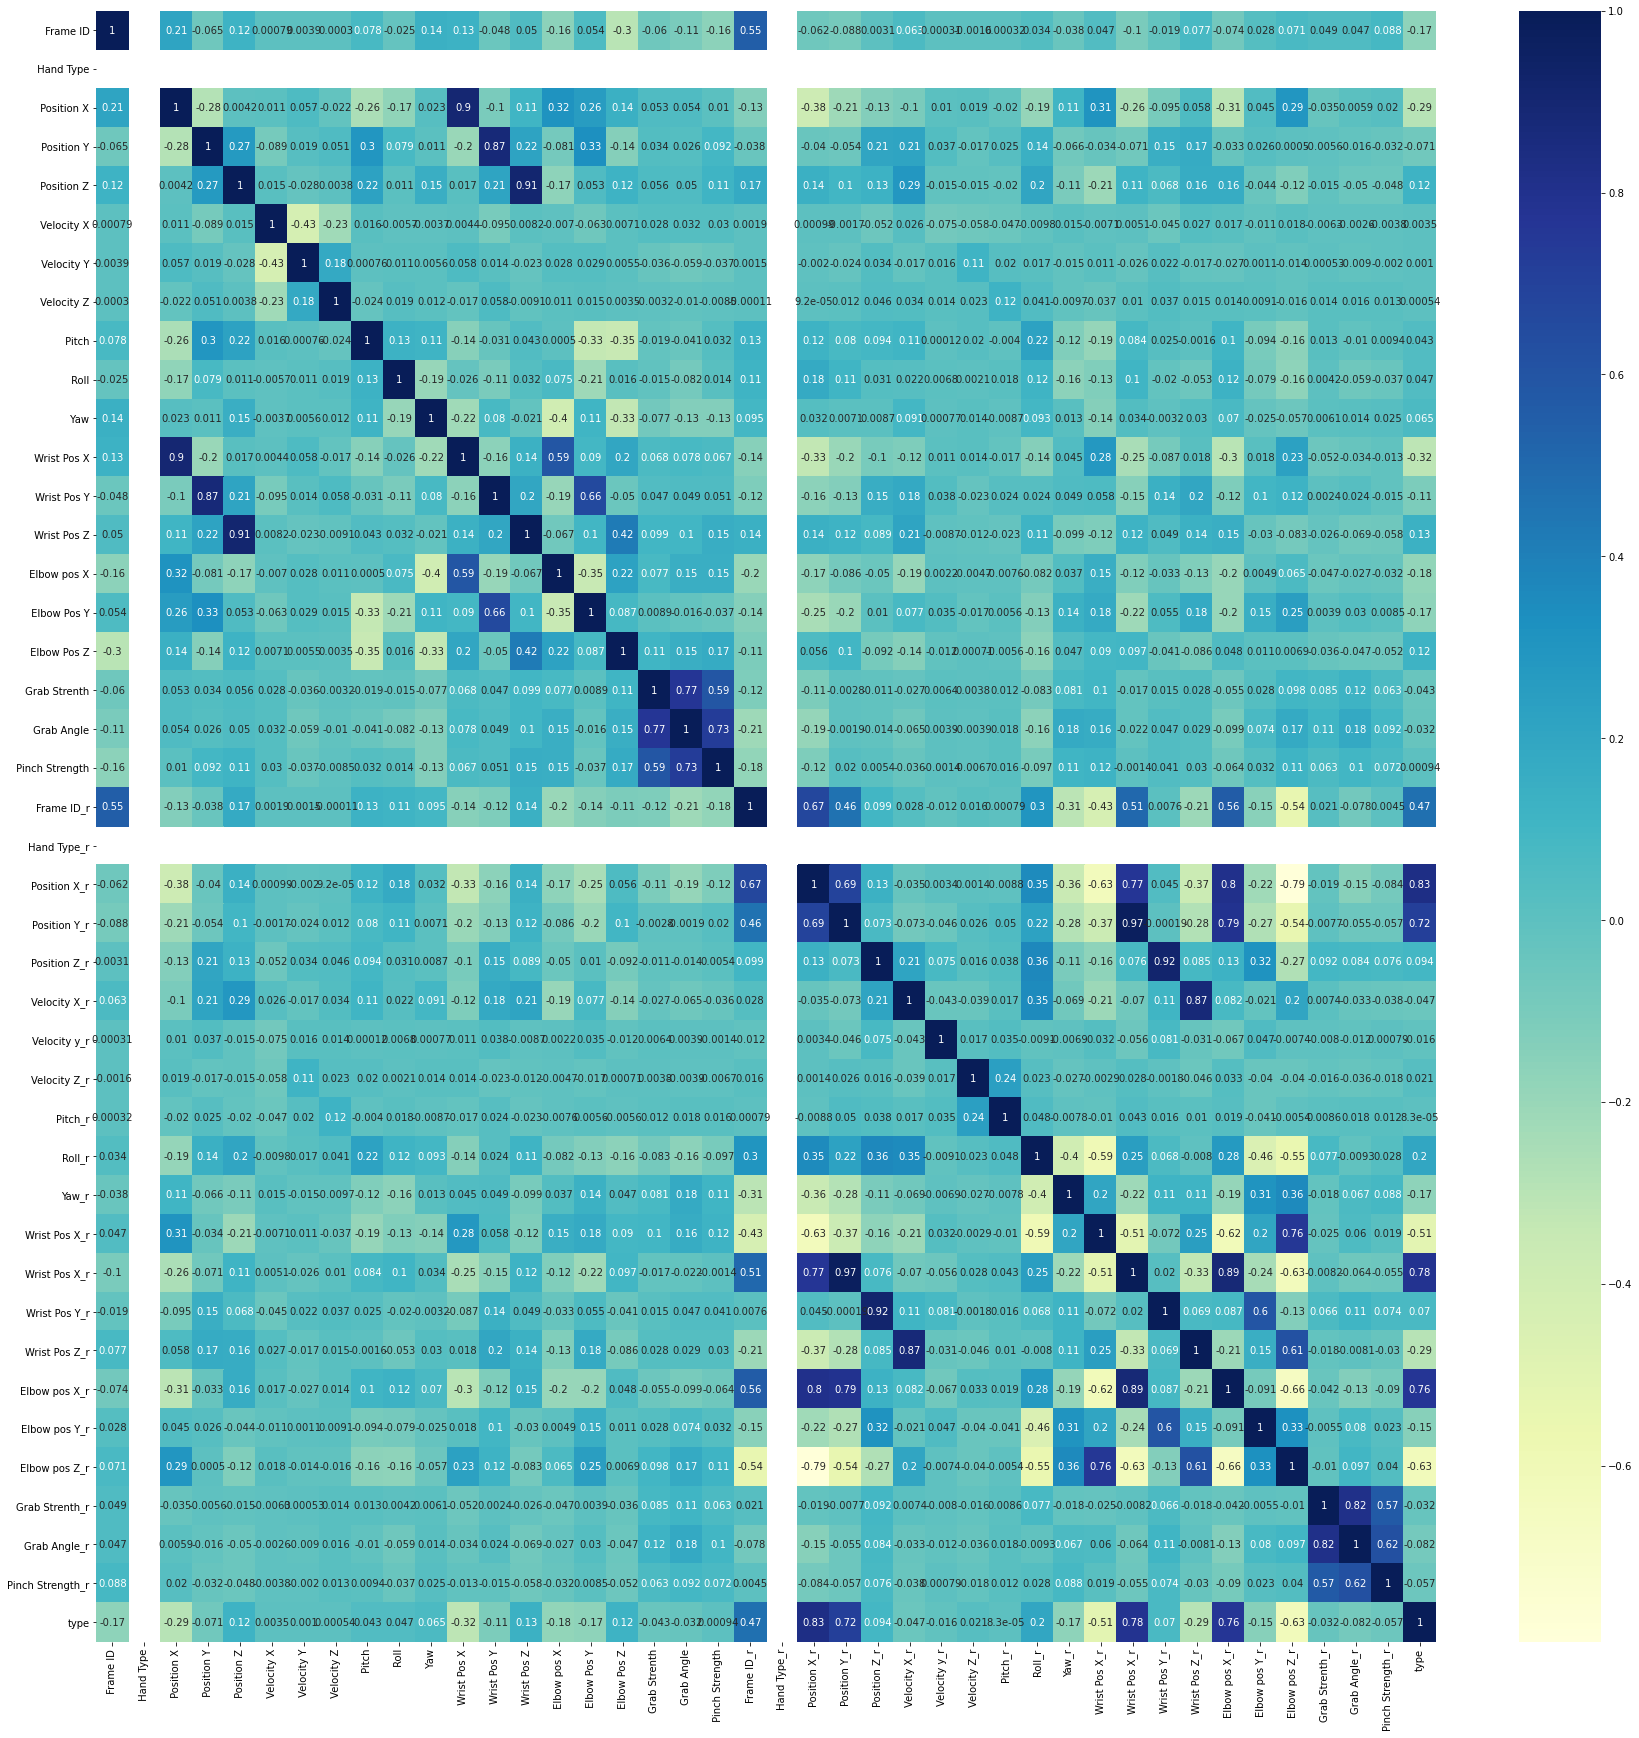

In [37]:
# corallation matrix between all of the columns

plt.figure(figsize=(30,30))
corrMatrix = data.corr()
sns.heatmap(corrMatrix, cmap="YlGnBu",annot=True)
plt.show()

In [38]:
#shuffling the data so that it isn't all in order.
train_set=data.sample(frac=1)
test_set=data_test.sample(frac=1)

In [39]:
# changing the data to numpy array so that i can see the pictures, and split the data 

train_set=np.array(train_set,dtype='float32')
test_set=np.array(test_set,dtype='float32')

In [40]:
# dividing the data to x,y

train_set_x=train_set[:,0:41]
train_set_y=train_set[:,41]
test_set_x=test_set[:,0:41]
test_set_y=test_set[:,41]

## Training the models

In [41]:
# function to represent the confusion matrix nicely
def confussion_matrix(cf_matrix):
    plt.figure(figsize=(4,3))
    sns.heatmap(cf_matrix, annot=True, fmt='', cmap='Purples')

## KNN1

In [147]:
a=0
for x in range (3,70):
    knn1 = KNeighborsClassifier(n_neighbors=x)
    knn1.fit(train_set_x, train_set_y)
    y_pred_knn1=knn1.predict(test_set_x)
    accuracy_knn1=metrics.accuracy_score(test_set_y, y_pred_knn1)
    if(accuracy_knn1>a):
        a=accuracy_knn1
        print(x, accuracy_knn1)
    else: 
        print(x)

3 0.8297966793927017
4 0.8349462842937051
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34 0.8354790020420847
35
36 0.8360117197904644
37
38 0.8362780786646542
39
40 0.8364556512474474
41
42 0.8370771552872237
43
44 0.8376986593269999
45
46 0.8381425907839829
47
48 0.8388528811151558
49
50 0.8392080262807422
51
52
53
54 0.8402734617775015
55
56 0.8405398206516914
57
58 0.8408061795258812
59
60 0.8413388972742608
61
62 0.842226760188227
63
64 0.8425819053538134
65
66
67
68 0.8428482642280032
69


In [148]:
# 4 neighbors has the highest result
knn1 = KNeighborsClassifier(n_neighbors=68)
knn1.fit(train_set_x, train_set_y)
y_pred_knn1=knn1.predict(test_set_x)
accuracy_knn1=metrics.accuracy_score(test_set_y, y_pred_knn1)
accuracy_knn1

0.8428482642280032

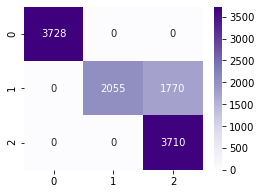

In [149]:
mat_knn1=confusion_matrix(test_set_y, y_pred_knn1)
confussion_matrix(mat_knn1)

In [150]:
print("precision_score_knn:",precision_score(test_set_y, y_pred_knn1,average='weighted')) 
print("recall_score_knn:",recall_score(test_set_y, y_pred_knn1,average='weighted'))
print("f1_score_knn:",f1_score(test_set_y, y_pred_knn1,average='weighted'))

precision_score_knn: 0.8936071277893963
recall_score_knn: 0.8428482642280032
f1_score_knn: 0.8343290878609136


In [151]:
cv_scores_knn1=cross_val_score(knn1, train_set_x, train_set_y, cv=5, scoring="accuracy")
print(cv_scores_knn1, "mean:", np.mean(cv_scores_knn1))

[0.98985489 0.98991638 0.99059272 0.98776439 0.9889941 ] mean: 0.9894244958189867


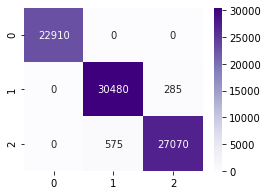

In [152]:
y_pred_knn1_c = cross_val_predict(knn1,  train_set_x, train_set_y, cv=5)
cofussion_knn1=confusion_matrix(train_set_y, y_pred_knn1_c)
confussion_matrix(cofussion_knn1)

In [153]:
# precision call, recalll score, f1 score
print("precision_score:",precision_score(train_set_y, y_pred_knn1_c,average='weighted')) 
print("recall_score:",recall_score(train_set_y, y_pred_knn1_c,average='weighted'))
print("f1_score:",f1_score(train_set_y, y_pred_knn1_c,average='weighted'))

precision_score: 0.9894533708832827
recall_score: 0.9894244958189867
f1_score: 0.9894214199929567


## XG

In [55]:
arr=np.arange(450,500,5)
arr

array([450, 455, 460, 465, 470, 475, 480, 485, 490, 495])

In [56]:
a=0
for x in arr:
    XG1=XGBClassifier(n_estimators=x, max_depth=2, eta=0.1, subsample=0.7, colsample_bytree=0.8,
                 use_label_encoder =False,eval_metric = "logloss")
    XG1.fit(train_set_x, train_set_y)
    y_pred_XG1=XG1.predict(test_set_x)
    accuracy_XG1=metrics.accuracy_score(test_set_y, y_pred_XG1)
    if (accuracy_XG1>a):
        a=accuracy_XG1
        print( x, a)
    else:
        print(x)

450 0.8813815146941312
455 0.882091805025304
460 0.8838675308532362
465 0.8840451034360295
470
475
480 0.8851105389327888
485
490
495 0.8865311195951345


In [138]:
XG1=XGBClassifier(n_estimators=495, max_depth=2, eta=0.1, subsample=0.7, colsample_bytree=0.8,
                 use_label_encoder =False,eval_metric = "logloss") 
XG1.fit(train_set_x, train_set_y)
y_pred_XG1=XG1.predict(test_set_x)
accuracy_XG1=metrics.accuracy_score(test_set_y, y_pred_XG1)
accuracy_XG1

0.8865311195951345

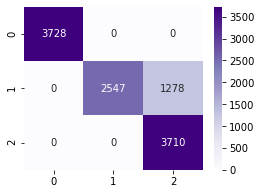

In [139]:
mat_XG1=confusion_matrix(test_set_y, y_pred_XG1)
confussion_matrix(mat_XG1)

In [140]:
print("precision_score_XG:",precision_score(test_set_y, y_pred_XG1,average='weighted')) 
print("recall_score_XG:",recall_score(test_set_y, y_pred_XG1,average='weighted'))
print("f1_score_XG:",f1_score(test_set_y, y_pred_XG1,average='weighted'))

precision_score_XG: 0.9156035392337507
recall_score_XG: 0.8865311195951345
f1_score_XG: 0.8834881881524654


In [141]:
# cross validation
cv_scores_XG1=cross_val_score(XG1, train_set_x, train_set_y, cv=5, scoring="accuracy")
print(cv_scores_XG1, "mean:", np.mean(cv_scores_XG1))

[1.         1.         0.99993851 0.99993851 1.        ] mean: 0.9999754058042303


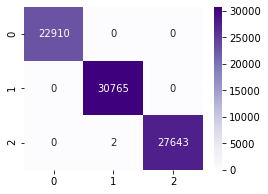

In [142]:
y_pred_XG1_c = cross_val_predict(XG1,  train_set_x, train_set_y, cv=5)
cofussion_XG1=confusion_matrix(train_set_y, y_pred_XG1_c)
confussion_matrix(cofussion_XG1)

In [143]:
# precision call, recalll score, f1 score
print("precision_score:",precision_score(train_set_y, y_pred_XG1_c,average='weighted')) 
print("recall_score:",recall_score(train_set_y, y_pred_XG1_c,average='weighted'))
print("f1_score:",f1_score(train_set_y, y_pred_XG1_c,average='weighted'))

precision_score: 0.9999754074029689
recall_score: 0.9999754058042302
f1_score: 0.9999754057590899


## Random Forest

In [63]:
forest1= RandomForestClassifier(random_state=42)
forest1.fit(train_set_x, train_set_y)
y_pred_forest1=forest1.predict(test_set_x)
accuracy_forest1=metrics.accuracy_score(test_set_y, y_pred_forest1)
accuracy_forest1

0.8399183166119151

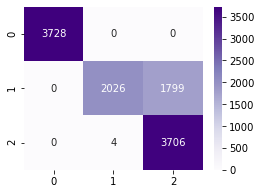

In [64]:
mat_forest1=confusion_matrix(test_set_y, y_pred_forest1)
confussion_matrix(mat_forest1)

In [65]:
print("precision_score_forest:",precision_score(test_set_y, y_pred_forest1,average='weighted')) 
print("recall_score_forset:",recall_score(test_set_y, y_pred_forest1,average='weighted'))
print("f1_score_forest:",f1_score(test_set_y, y_pred_forest1,average='weighted'))

precision_score_forest: 0.8916858712511762
recall_score_forset: 0.8399183166119151
f1_score_forest: 0.830970993147358


In [66]:
# cross validation
cv_scores_forest1=cross_val_score(forest1, train_set_x, train_set_y, cv=5, scoring="accuracy")
print(cv_scores_forest1, "mean:", np.mean(cv_scores_forest1))

[1.         0.99993851 0.99993851 0.99987703 0.99993851] mean: 0.9999385145105755


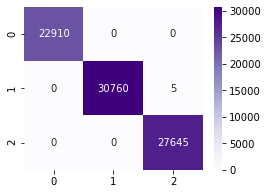

In [67]:
y_pred_forest1_c = cross_val_predict(forest1,  train_set_x, train_set_y, cv=5)
cofussion_forest1=confusion_matrix(train_set_y, y_pred_forest1_c)
confussion_matrix(cofussion_forest1)

In [68]:
# precision call, recalll score, f1 score
print("precision_score:",precision_score(train_set_y, y_pred_forest1_c,average='weighted')) 
print("recall_score:",recall_score(train_set_y, y_pred_forest1_c,average='weighted'))
print("f1_score:",f1_score(train_set_y, y_pred_forest1_c,average='weighted'))

precision_score: 0.9999385256291088
recall_score: 0.9999385145105755
f1_score: 0.9999385147920656


## Logistic Regression

In [69]:
lr1=LogisticRegression(random_state=9)
lr1.fit(train_set_x, train_set_y)
y_pred_lr1=lr1.predict(test_set_x)
accuracy_lr1=metrics.accuracy_score(test_set_y, y_pred_lr1)
accuracy_lr1

0.7922400781319364

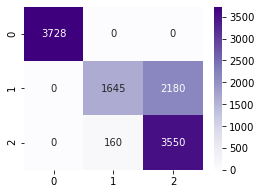

In [70]:
mat_lr1=confusion_matrix(test_set_y, y_pred_lr1)
confussion_matrix(mat_lr1)

In [71]:
print("precision_score_lr:",precision_score(test_set_y, y_pred_lr1,average='weighted')) 
print("recall_score_lr:",recall_score(test_set_y, y_pred_lr1,average='weighted'))
print("f1_score_lr:",f1_score(test_set_y, y_pred_lr1,average='weighted'))

precision_score_lr: 0.8445759040807493
recall_score_lr: 0.7922400781319364
f1_score_lr: 0.7771973109618786


In [72]:
# cross validation
cv_scores_lr1=cross_val_score(lr1, train_set_x, train_set_y, cv=5, scoring="accuracy")
print(cv_scores_lr1, "mean:", np.mean(cv_scores_lr1))

[0.82482784 0.82827103 0.8279636  0.82777914 0.83380472] mean: 0.828529267092966


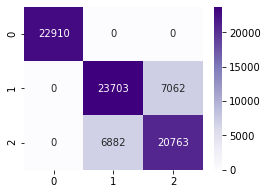

In [73]:
y_pred_lr1_c = cross_val_predict(lr1,  train_set_x, train_set_y, cv=5)
cofussion_lr1=confusion_matrix(train_set_y, y_pred_lr1_c)
confussion_matrix(cofussion_lr1)

In [74]:
# precision call, recalll score, f1 score
print("precision_score:",precision_score(train_set_y, y_pred_lr1_c,average='weighted')) 
print("recall_score:",recall_score(train_set_y, y_pred_lr1_c,average='weighted'))
print("f1_score:",f1_score(train_set_y, y_pred_lr1_c,average='weighted'))

precision_score: 0.828592989302396
recall_score: 0.828529267092966
f1_score: 0.8285559318178222


 ## Adaboost

In [75]:
arr = np.arange(50,150,5)
arr

array([ 50,  55,  60,  65,  70,  75,  80,  85,  90,  95, 100, 105, 110,
       115, 120, 125, 130, 135, 140, 145])

In [76]:
count_ada=0
for x in arr:
        ada = AdaBoostClassifier(random_state=42, n_estimators=x,learning_rate=0.5)
        ada.fit(train_set_x, train_set_y)
        y_pred_ada = ada.predict(test_set_x)
        a_ada=metrics.accuracy_score(test_set_y, y_pred_ada)
        if a_ada>count_ada:
            count_ada=a_ada
            print(x, count_ada)
        else:
            print(x)

50 0.8739234662168162
55
60
65
70
75
80
85
90
95
100
105
110
115
120
125
130
135
140
145


In [154]:
ada = AdaBoostClassifier(random_state=42, n_estimators=50,learning_rate=0.5)
ada.fit(train_set_x, train_set_y)
y_pred_ada = ada.predict(test_set_x)
accuracy_ada=metrics.accuracy_score(test_set_y, y_pred_ada)
accuracy_ada

0.8739234662168162

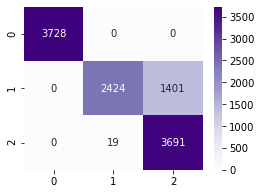

In [155]:
mat_ada=confusion_matrix(test_set_y, y_pred_ada)
confussion_matrix(mat_ada)

In [156]:
print("precision_score_ada:",precision_score(test_set_y, y_pred_ada,average='weighted')) 
print("recall_score_ada:",recall_score(test_set_y, y_pred_ada,average='weighted'))
print("f1_score_ada:",f1_score(test_set_y, y_pred_ada,average='weighted'))

precision_score_ada: 0.9067292660883803
recall_score_ada: 0.8739234662168162
f1_score_ada: 0.8699220975578694


In [157]:
# cross validation
cv_scores_ada=cross_val_score(ada, train_set_x, train_set_y, cv=5, scoring="accuracy")
print(cv_scores_ada, "mean:", np.mean(cv_scores_ada))

[0.81849484 0.79291687 0.81769552 0.86024348 0.76574029] mean: 0.8110181997048697


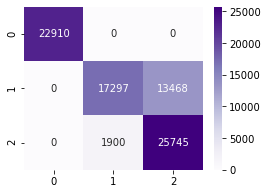

In [158]:
y_pred_ada_c = cross_val_predict(ada,  train_set_x, train_set_y, cv=5)
cofussion_ada=confusion_matrix(train_set_y, y_pred_ada_c)
confussion_matrix(cofussion_ada)

In [159]:
# precision call, recalll score, f1 score
print("precision_score:",precision_score(train_set_y, y_pred_ada_c,average='weighted')) 
print("recall_score:",recall_score(train_set_y, y_pred_ada_c,average='weighted'))
print("f1_score:",f1_score(train_set_y, y_pred_ada_c,average='weighted'))

precision_score: 0.8457967016152492
recall_score: 0.8110181997048697
f1_score: 0.8054892966996083


## Voting Classifier

In [180]:
vote1=VotingClassifier(estimators=[('knn1',knn1),('xg1',XG1),('forest1',forest1),('lr1',lr1),('ada',ada)],
                       voting='soft',weights=[0.2,0.6,0.2,0.2,0.3])
vote1.fit(train_set_x, train_set_y)
y_pred_vote1=vote1.predict(test_set_x)
accuracy_vote1=metrics.accuracy_score(test_set_y, y_pred_vote1)
accuracy_vote1

0.8666429903222942

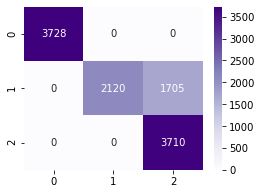

In [162]:
mat_vote1=confusion_matrix(test_set_y, y_pred_vote1)
confussion_matrix(mat_vote1)

In [163]:
print("precision_score_vote:",precision_score(test_set_y, y_pred_vote1,average='weighted')) 
print("recall_score_vote:",recall_score(test_set_y, y_pred_vote1,average='weighted'))
print("f1_score_vote:",f1_score(test_set_y, y_pred_vote1,average='weighted'))

precision_score_vote: 0.8962840026696554
recall_score_vote: 0.8486193731687828
f1_score_vote: 0.8410544055259731


In [164]:
# cross validation
cv_scores_vote1=cross_val_score(vote1, train_set_x, train_set_y, cv=5, scoring="accuracy")
print(cv_scores_vote1, "mean:", np.mean(cv_scores_vote1))

[1.         0.99987703 0.99987703 0.99993851 0.99993851] mean: 0.9999262174126906


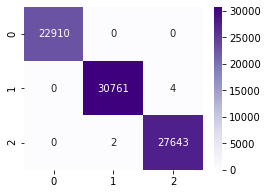

In [165]:
y_pred_vote1_c = cross_val_predict(vote1,  train_set_x, train_set_y, cv=5)
cofussion_vote1=confusion_matrix(train_set_y, y_pred_vote1_c)
confussion_matrix(cofussion_vote1)

In [166]:
# precision call, recalll score, f1 score
print("precision_score:",precision_score(train_set_y, y_pred_vote1_c,average='weighted')) 
print("recall_score:",recall_score(train_set_y, y_pred_vote1_c,average='weighted'))
print("f1_score:",f1_score(train_set_y, y_pred_vote1_c,average='weighted'))

precision_score: 0.9999262193720609
recall_score: 0.9999262174126906
f1_score: 0.9999262175479368


## Pipeline

In [330]:
def pipes (x,y):  
    pipe=Pipeline([('scaler', StandardScaler()),(x,y)])
    pipe.fit(train_set_x,train_set_y)
    y_pred=pipe.predict(test_set_x)
    acuracy_pipe=pipe.score(test_set_x,test_set_y)
    print(x,acuracy_pipe)
    print(confusion_matrix(test_set_y, y_pred))
    print("precision_score:",precision_score(test_set_y, y_pred,average='weighted')) 
    print("recall_score:",recall_score(test_set_y, y_pred,average='weighted'))
    print("f1_score:",f1_score(test_set_y, y_pred,average='weighted'))
    print()

In [389]:
classifiers=[LogisticRegression(),RandomForestClassifier(),AdaBoostClassifier(),XGBClassifier(),KNeighborsClassifier(),GradientBoostingClassifier()]
names=["lr","forest","ada","xg","knn","grb"]

In [391]:
count=0
while (count<6):
    pipes(names[count],classifiers[count])
    count=count+1

lr 0.8583858652224097
[[3728    0    0]
 [   0 2306 1519]
 [   0   76 3634]]
precision_score: 0.8920648905701315
recall_score: 0.8583858652224097
f1_score: 0.8534528947632958

forest 0.8462221433010743
[[3728    0    0]
 [   0 2101 1724]
 [   0    8 3702]]
precision_score: 0.8940526051204566
recall_score: 0.8462221433010743
f1_score: 0.8384292489929711

ada 0.670602858918583
[[3728    0    0]
 [   0 3825    0]
 [   0 3710    0]]
precision_score: 0.503390640652303
recall_score: 0.670602858918583
f1_score: 0.5596922898484755

[10:17:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
xg 0.8976294060197105
[[3728    0    0]
 [   0 2672 1153]
 [   0    0 3710]]
precision_score: 0.9219011096716277
recall_score: 0.8976294060197105
f1_score: 0.8

In [438]:
pipe_ada=Pipeline([('scaler', StandardScaler()),('ada',AdaBoostClassifier())])
pipe_ada.fit(train_set_x,train_set_y)
y_pred_ada=pipe_ada.predict(test_set_x)
pipe_xg=Pipeline([('scaler', StandardScaler()),('xg',XGBClassifier())])
pipe_xg.fit(train_set_x,train_set_y)
y_pred_xg=pipe_xg.predict(test_set_x)
pipe_knn=Pipeline([('scaler', StandardScaler()),('knn',KNeighborsClassifier())])
pipe_knn.fit(train_set_x,train_set_y)
y_pred_knn=pipe_knn.predict(test_set_x)
pipe_grb=Pipeline([('scaler', StandardScaler()),('grb',GradientBoostingClassifier())])
pipe_grb.fit(train_set_x,train_set_y)
y_pred_grb=pipe_grb.predict(test_set_x)

[11:15:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [439]:
y_pred_xg=y_pred_xg.astype(int)
y_pred_ada=y_pred_ada.astype(int)
y_pred_knn=y_pred_knn.astype(int)
y_pred_grb=y_pred_grb.astype(int)

In [440]:
y_pred_ada

array([1, 1, 0, ..., 0, 1, 0])

In [441]:
y_pred_xg

array([2, 2, 0, ..., 0, 2, 0])

In [442]:
y_pred_knn

array([2, 2, 0, ..., 0, 2, 0])

In [443]:
y_pred_grb

array([2, 2, 0, ..., 0, 2, 0])

In [461]:
y_pred_my_classifier=[]
for x in range(0,11263):
    if (y_pred_xg[x]==0):
        y_pred_my_classifier.append(y_pred_xg[x])
    elif (y_pred_grb[x]==1 ):
        y_pred_my_classifier.append(y_pred_grb[x])
    elif(y_pred_knn[x]==1 and y_pred_ada[x]==1):
        y_pred_my_classifier.append(y_pred_knn[x]) 
    else:
        y_pred_my_classifier.append(y_pred_xg[x]) 

In [462]:
accuracy_class=metrics.accuracy_score(test_set_y, y_pred_my_classifier)
accuracy_class

0.8935452366154666

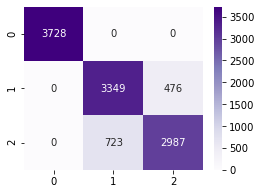

In [463]:
mat_class1=confusion_matrix(test_set_y, y_pred_my_classifier)
confussion_matrix(mat_class1)

## test data

In [219]:
# importing the test data for alone

df_test_alone_person1=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Validation\Itiel Lab\Itiel636770942529041679Alone.csv')
df_test_alone_person2=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Validation\Mor SHerman\Mor636771066407626524Alone.csv')
df_test_alone_person3=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Validation\Oded Medina\Oded636754669540564461Alone.csv')
      
df_hand_right=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\HandRight.csv')

In [220]:
# changing the names for the columns in the right hand data frame

df_hand_right=df_hand_right.set_axis(columns_right, axis='columns') 

In [221]:
# deleting rows with null values

df_test_alone_person1=df_test_alone_person1.dropna('index','any')
df_test_alone_person2=df_test_alone_person2.dropna('index','any')
df_test_alone_person3=df_test_alone_person3.dropna('index','any')

In [222]:
# adding the right hand to the left

df_test_alone_person1_combo=pd.concat([df_test_alone_person1,df_hand_right],axis=1,)
df_test_alone_person2_combo=pd.concat([df_test_alone_person2,df_hand_right],axis=1,)
df_test_alone_person3_combo=pd.concat([df_test_alone_person3,df_hand_right],axis=1,)

In [223]:
# adding a laybel

df_test_alone_person1_combo["type"]=0
df_test_alone_person2_combo["type"]=0
df_test_alone_person3_combo["type"]=0

In [224]:
# setting the index to the time stamp

df_test_alone_person1_combo=df_test_alone_person1_combo.set_index('Time')
df_test_alone_person2_combo=df_test_alone_person2_combo.set_index('Time')
df_test_alone_person3_combo=df_test_alone_person3_combo.set_index('Time')

In [225]:
# getting rid of any rows with nulls

df_test_alone_person1_combo=df_test_alone_person1_combo.dropna('index','any')
df_test_alone_person1_combo=df_test_alone_person1_combo.dropna('index','any')
df_test_alone_person1_combo=df_test_alone_person1_combo.dropna('index','any')

In [226]:
# getting rid of the 7 first secounds

df_test_alone_person1_combo=df_test_alone_person1_combo.iloc[700:]
df_test_alone_person2_combo=df_test_alone_person2_combo.iloc[700:]
df_test_alone_person3_combo=df_test_alone_person3_combo.iloc[700:]

In [227]:
# importing the test data for sync

df_test_sync_person1=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Validation\Itiel Lab\Itiel636770941638547912Sync.csv')
df_test_sync_person2=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Validation\Mor SHerman\Mor636771065531910215Sync.csv')
df_test_sync_person3=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Validation\Oded Medina\Oded636754671560850581Sync.csv')

In [228]:
# seperating the left hand from the right hand

df_test_sync_person1_r=df_test_sync_person1.loc[df_test_sync_person1[' Hand Type']=="right"]
df_test_sync_person2_r=df_test_sync_person2.loc[df_test_sync_person2[' Hand Type']=="right"]
df_test_sync_person3_r=df_test_sync_person3.loc[df_test_sync_person3[' Hand Type']=="right"]
df_test_sync_person1_l=df_test_sync_person1.loc[df_test_sync_person1[' Hand Type']=="left"]
df_test_sync_person2_l=df_test_sync_person2.loc[df_test_sync_person2[' Hand Type']=="left"]
df_test_sync_person3_l=df_test_sync_person3.loc[df_test_sync_person3[' Hand Type']=="left"]

In [229]:
# changing the names for the columns in the right hand data frame

df_test_sync_person1_r=df_test_sync_person1_r.set_axis(columns_right, axis='columns')
df_test_sync_person2_r=df_test_sync_person2_r.set_axis(columns_right, axis='columns')
df_test_sync_person3_r=df_test_sync_person3_r.set_axis(columns_right, axis='columns')

In [230]:
# setting the index to the time stamp

df_test_sync_person1_r=df_test_sync_person1_r.set_index('Time_r')
df_test_sync_person2_r=df_test_sync_person2_r.set_index('Time_r')
df_test_sync_person3_r=df_test_sync_person3_r.set_index('Time_r')
df_test_sync_person1_l=df_test_sync_person1_l.set_index('Time')
df_test_sync_person2_l=df_test_sync_person2_l.set_index('Time')
df_test_sync_person3_l=df_test_sync_person3_l.set_index('Time')

In [231]:
# combing the left and right back together so that they are in 1 row by the time stamp
# the left hand is on the left and the right hand is on the right

df_test_sync_person1_combo=pd.concat([df_test_sync_person1_l,df_test_sync_person1_r],axis=1)
df_test_sync_person2_combo=pd.concat([df_test_sync_person2_l,df_test_sync_person2_r],axis=1)
df_test_sync_person3_combo=pd.concat([df_test_sync_person3_l,df_test_sync_person3_r],axis=1)

In [232]:
# only keeping the rows that have two hands

df_test_sync_person1_combo=df_test_sync_person1_combo.loc[df_test_sync_person1_combo[' # hands']==2]
df_test_sync_person2_combo=df_test_sync_person2_combo.loc[df_test_sync_person2_combo[' # hands']==2]
df_test_sync_person3_combo=df_test_sync_person3_combo.loc[df_test_sync_person3_combo[' # hands']==2]

In [233]:
# adding a laybel

df_test_sync_person1_combo["type"]=1
df_test_sync_person2_combo["type"]=1
df_test_sync_person3_combo["type"]=1

In [234]:
# getting rid of the 7 first secounds

df_test_sync_person1_combo=df_test_sync_person1_combo.iloc[700:]
df_test_sync_person2_combo=df_test_sync_person2_combo.iloc[700:]
df_test_sync_person3_combo=df_test_sync_person3_combo.iloc[700:]

In [235]:
# importing the test data for spontan

df_test_spontan_person1=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Validation\Itiel Lab\Itiel636770940701219076Spontan.csv')
df_test_spontan_person2=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Validation\Mor SHerman\Mor636771064635567065Spontan.csv')
df_test_spontan_person3=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Validation\Oded Medina\Oded636754670490266956Spontan.csv')

In [236]:
# seperating the left hand from the right hand

df_test_spontan_person1_r=df_test_spontan_person1.loc[df_test_spontan_person1[' Hand Type']=="right"]
df_test_spontan_person2_r=df_test_spontan_person2.loc[df_test_spontan_person2[' Hand Type']=="right"]
df_test_spontan_person3_r=df_test_spontan_person3.loc[df_test_spontan_person3[' Hand Type']=="right"]
df_test_spontan_person1_l=df_test_spontan_person1.loc[df_test_spontan_person1[' Hand Type']=="left"]
df_test_spontan_person2_l=df_test_spontan_person2.loc[df_test_spontan_person2[' Hand Type']=="left"]
df_test_spontan_person3_l=df_test_spontan_person3.loc[df_test_spontan_person3[' Hand Type']=="left"]

In [237]:
# changing the names for the columns in the right hand data frame

df_test_spontan_person1_r=df_test_spontan_person1_r.set_axis(columns_right,axis='columns')
df_test_spontan_person2_r=df_test_spontan_person2_r.set_axis(columns_right,axis='columns')
df_test_spontan_person3_r=df_test_spontan_person3_r.set_axis(columns_right,axis='columns')

In [238]:
# setting the index to the time stamp

df_test_spontan_person1_r=df_test_spontan_person1_r.set_index('Time_r')
df_test_spontan_person2_r=df_test_spontan_person2_r.set_index('Time_r')
df_test_spontan_person3_r=df_test_spontan_person3_r.set_index('Time_r')
df_test_spontan_person1_l=df_test_spontan_person1_l.set_index('Time')
df_test_spontan_person2_l=df_test_spontan_person2_l.set_index('Time')
df_test_spontan_person3_l=df_test_spontan_person3_l.set_index('Time')

In [239]:
# combing the left and right back together so that they are in 1 row by the time stamp
# the left hand is on the left and the right hand is on the right

df_test_spontan_person1_combo=pd.concat([df_test_spontan_person1_l,df_test_spontan_person1_r],axis=1)
df_test_spontan_person2_combo=pd.concat([df_test_spontan_person2_l,df_test_spontan_person2_r],axis=1)
df_test_spontan_person3_combo=pd.concat([df_test_spontan_person3_l,df_test_spontan_person3_r],axis=1)

In [240]:
# only keeping the rows that have two hands

df_test_spontan_person1_combo=df_test_spontan_person1_combo.loc[df_test_spontan_person1_combo[" # hands"]==2]
df_test_spontan_person2_combo=df_test_spontan_person2_combo.loc[df_test_spontan_person2_combo[" # hands"]==2]
df_test_spontan_person3_combo=df_test_spontan_person3_combo.loc[df_test_spontan_person3_combo[" # hands"]==2]

In [241]:
# adding a laybel

df_test_spontan_person1_combo["type"]=2
df_test_spontan_person2_combo["type"]=2
df_test_spontan_person3_combo["type"]=2

In [242]:
# getting rid of the 7 first secounds

df_test_spontan_person1_combo=df_test_spontan_person1_combo.iloc[700:]
df_test_spontan_person2_combo=df_test_spontan_person2_combo.iloc[700:]
df_test_spontan_person3_combo=df_test_spontan_person3_combo.iloc[700:]

In [243]:
# combining each type of data togeter into new data frames

data_test1=pd.concat([df_test_alone_person1_combo,df_test_alone_person1_combo,df_test_alone_person1_combo],axis=0)
data_test2=pd.concat([df_test_sync_person1_combo,df_test_sync_person2_combo,df_test_sync_person3_combo],axis=0)
data_test3=pd.concat([df_test_spontan_person1_combo,df_test_spontan_person2_combo,df_test_spontan_person3_combo],axis=0)

In [244]:
# getting rid of the column "Time_r" in the alone data frame (the others dont have that column)

data_test1=data_test1.drop(['Time_r'],axis=1)
data_test1.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 11184 entries, 966.6613 to 1025.529
Data columns (total 43 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0    Frame ID         11184 non-null  float64
 1    Hand Type        11184 non-null  object 
 2    # hands          11184 non-null  float64
 3    Position X       11184 non-null  float64
 4    Position Y       11184 non-null  float64
 5    Position Z       11184 non-null  float64
 6    Velocity X       11184 non-null  float64
 7    Velocity Y       11184 non-null  float64
 8    Velocity Z       11184 non-null  float64
 9    Pitch            11184 non-null  float64
 10   Roll             11184 non-null  float64
 11   Yaw              11184 non-null  float64
 12   Wrist Pos X      11184 non-null  float64
 13   Wrist Pos Y      11184 non-null  float64
 14   Wrist Pos Z      11184 non-null  float64
 15   Elbow pos X      11184 non-null  float64
 16   Elbow Pos Y      11184 non-

In [245]:
# combining the 3 data frames into 1 data frame

data_test=pd.concat([data_test1,data_test2,data_test3],axis=0)
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 29153 entries, 966.6613 to 891.8492
Data columns (total 43 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0    Frame ID         29153 non-null  float64
 1    Hand Type        29153 non-null  object 
 2    # hands          29153 non-null  float64
 3    Position X       29153 non-null  float64
 4    Position Y       29153 non-null  float64
 5    Position Z       29153 non-null  float64
 6    Velocity X       29153 non-null  float64
 7    Velocity Y       29153 non-null  float64
 8    Velocity Z       29153 non-null  float64
 9    Pitch            29153 non-null  float64
 10   Roll             29153 non-null  float64
 11   Yaw              29153 non-null  float64
 12   Wrist Pos X      29153 non-null  float64
 13   Wrist Pos Y      29153 non-null  float64
 14   Wrist Pos Z      29153 non-null  float64
 15   Elbow pos X      29153 non-null  float64
 16   Elbow Pos Y      29153 non-

In [246]:
data_test

,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,Pitch,...,Wrist Pos X_r,Wrist Pos Y_r,Wrist Pos Z_r,Elbow pos X_r,Elbow pos Y_r,Elbow pos Z_r,Grab Strenth_r,Grab Angle_r,Pinch Strength_r,type
966.6613,112701.0,left,1.0,-89.46551,282.5517,104.14670,59.477310,-222.84010,114.072300,2.621086,...,39.77090,197.3047,99.29434,171.1660,52.266810,287.7588,0.0,0.498644,0.0,0
966.6778,112703.0,left,1.0,-89.09656,278.4751,105.77440,-13.318180,-215.47790,72.303980,2.666370,...,44.53930,202.0048,101.27940,172.6115,51.288290,287.5629,0.0,0.520795,0.0,0
966.6948,112705.0,left,1.0,-88.56313,274.1503,106.46620,54.813290,-279.77750,22.959880,2.720711,...,48.87646,204.2281,103.38490,173.7377,52.089050,290.6891,0.0,0.527123,0.0,0
966.7109,112707.0,left,1.0,-88.37968,270.0990,107.01780,8.587542,-235.26190,21.513070,2.800939,...,53.62828,206.4552,105.76730,174.1449,50.322340,292.6303,0.0,0.504663,0.0,0
966.7275,112709.0,left,1.0,-89.64819,267.5950,106.91000,-70.051510,-158.77360,-12.247460,2.951404,...,58.09599,208.3566,108.21800,175.0809,48.865160,294.4880,0.0,0.515524,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891.7161,58577.0,left,2.0,-119.09390,266.9509,90.19492,20.516860,-54.38897,-79.527550,0.935100,...,259.14380,214.1489,81.66591,357.1292,-23.849340,117.5243,0.0,0.000000,0.0,2
891.7498,58580.0,left,2.0,-119.68230,265.0744,88.75297,-31.678680,-38.33282,-30.122560,0.929250,...,263.39370,219.1755,90.31033,364.5702,-18.458120,118.9476,0.0,0.039183,0.0,2
891.7819,58583.0,left,2.0,-120.50570,263.0826,88.22878,-21.621920,-62.06139,-9.631733,0.933446,...,270.16560,225.3236,100.75550,377.3418,-11.117420,112.1917,0.0,0.070024,0.0,2
891.8161,58585.0,left,2.0,-121.26820,261.9093,88.43225,-38.911430,-56.67702,15.780990,0.933015,...,272.78680,227.7773,106.85620,384.1153,-6.891727,114.2839,0.0,0.104950,0.0,2


In [247]:
# dropping the column with "# hands" because all rows have 2 hands

data_test=data_test.drop([' # hands'],axis=1)

# changing the hand type, 0=left hand, 1=right hand

data_test[" Hand Type"]=0
data_test["Hand Type_r"]=1
data_test

<ipython-input-247-db84180ace98>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test[" Hand Type"]=0
<ipython-input-247-db84180ace98>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test["Hand Type_r"]=1


,Frame ID,Hand Type,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,Pitch,Roll,...,Wrist Pos X_r,Wrist Pos Y_r,Wrist Pos Z_r,Elbow pos X_r,Elbow pos Y_r,Elbow pos Z_r,Grab Strenth_r,Grab Angle_r,Pinch Strength_r,type
966.6613,112701.0,0,-89.46551,282.5517,104.14670,59.477310,-222.84010,114.072300,2.621086,-0.292849,...,39.77090,197.3047,99.29434,171.1660,52.266810,287.7588,0.0,0.498644,0.0,0
966.6778,112703.0,0,-89.09656,278.4751,105.77440,-13.318180,-215.47790,72.303980,2.666370,-0.231436,...,44.53930,202.0048,101.27940,172.6115,51.288290,287.5629,0.0,0.520795,0.0,0
966.6948,112705.0,0,-88.56313,274.1503,106.46620,54.813290,-279.77750,22.959880,2.720711,-0.178354,...,48.87646,204.2281,103.38490,173.7377,52.089050,290.6891,0.0,0.527123,0.0,0
966.7109,112707.0,0,-88.37968,270.0990,107.01780,8.587542,-235.26190,21.513070,2.800939,-0.122899,...,53.62828,206.4552,105.76730,174.1449,50.322340,292.6303,0.0,0.504663,0.0,0
966.7275,112709.0,0,-89.64819,267.5950,106.91000,-70.051510,-158.77360,-12.247460,2.951404,-0.102620,...,58.09599,208.3566,108.21800,175.0809,48.865160,294.4880,0.0,0.515524,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891.7161,58577.0,0,-119.09390,266.9509,90.19492,20.516860,-54.38897,-79.527550,0.935100,0.581712,...,259.14380,214.1489,81.66591,357.1292,-23.849340,117.5243,0.0,0.000000,0.0,2
891.7498,58580.0,0,-119.68230,265.0744,88.75297,-31.678680,-38.33282,-30.122560,0.929250,0.578519,...,263.39370,219.1755,90.31033,364.5702,-18.458120,118.9476,0.0,0.039183,0.0,2
891.7819,58583.0,0,-120.50570,263.0826,88.22878,-21.621920,-62.06139,-9.631733,0.933446,0.582374,...,270.16560,225.3236,100.75550,377.3418,-11.117420,112.1917,0.0,0.070024,0.0,2
891.8161,58585.0,0,-121.26820,261.9093,88.43225,-38.911430,-56.67702,15.780990,0.933015,0.586312,...,272.78680,227.7773,106.85620,384.1153,-6.891727,114.2839,0.0,0.104950,0.0,2


In [248]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 29153 entries, 966.6613 to 891.8492
Data columns (total 42 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0    Frame ID         29153 non-null  float64
 1    Hand Type        29153 non-null  int64  
 2    Position X       29153 non-null  float64
 3    Position Y       29153 non-null  float64
 4    Position Z       29153 non-null  float64
 5    Velocity X       29153 non-null  float64
 6    Velocity Y       29153 non-null  float64
 7    Velocity Z       29153 non-null  float64
 8    Pitch            29153 non-null  float64
 9    Roll             29153 non-null  float64
 10   Yaw              29153 non-null  float64
 11   Wrist Pos X      29153 non-null  float64
 12   Wrist Pos Y      29153 non-null  float64
 13   Wrist Pos Z      29153 non-null  float64
 14   Elbow pos X      29153 non-null  float64
 15   Elbow Pos Y      29153 non-null  float64
 16   Elbow Pos Z      29153 non-

In [249]:
# changing the data to numpy array so that i can see split the data 
data_test=data_test.sample(frac=1)
data_test=np.array(data_test,dtype='float32')

# dividing into x y

data_test_x=data_test[:,0:41]
data_test_y=data_test[:,41]

# starting the tests

## KNN1

In [250]:
y_pred_knn1_test=knn1.predict(data_test_x)
accuracy_knn1_test=metrics.accuracy_score(data_test_y,y_pred_knn1_test)
accuracy_knn1_test

0.6927931945254348

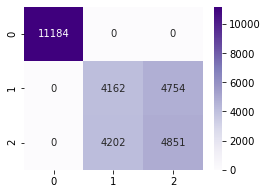

In [251]:
mat_knn1_test=confusion_matrix(data_test_y,y_pred_knn1_test)
confussion_matrix(mat_knn1_test)

In [252]:
print("precision_score_knn:",precision_score(data_test_y, y_pred_knn1_test,average='weighted')) 
print("recall_score_knn:",recall_score(data_test_y, y_pred_knn1_test,average='weighted'))
print("f1_score_knn:",f1_score(data_test_y, y_pred_knn1_test,average='weighted'))

precision_score_knn: 0.6926523088226484
recall_score_knn: 0.6927931945254348
f1_score_knn: 0.6924308011042069


## XG

In [256]:
y_pred_xg1_test=XG1.predict(data_test_x)
accuracy_xg1_test=metrics.accuracy_score(data_test_y,y_pred_xg1_test)
accuracy_xg1_test

0.7015401502418276

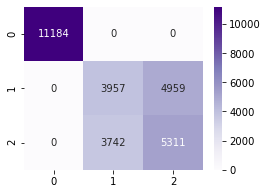

In [257]:
mat_xg1_test=confusion_matrix(data_test_y,y_pred_xg1_test)
confussion_matrix(mat_xg1_test)

In [258]:
print("precision_score_xg:",precision_score(data_test_y, y_pred_xg1_test,average='weighted')) 
print("recall_score_xg:",recall_score(data_test_y, y_pred_xg1_test,average='weighted'))
print("f1_score_xg:",f1_score(data_test_y, y_pred_xg1_test,average='weighted'))

precision_score_xg: 0.7014076323392148
recall_score_xg: 0.7015401502418276
f1_score_xg: 0.7000082860686699


## random forest

In [259]:
y_pred_forest1_test=forest1.predict(data_test_x)
accuracy_forest1_test=metrics.accuracy_score(data_test_y,y_pred_forest1_test)
accuracy_forest1_test

0.7138544918190237

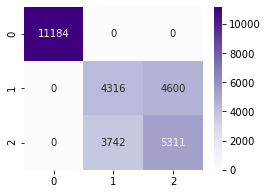

In [260]:
mat_forest1_test=confusion_matrix(data_test_y,y_pred_forest1_test)
confussion_matrix(mat_forest1_test)

In [261]:
print("precision_score_forest:",precision_score(data_test_y, y_pred_forest1_test,average='weighted')) 
print("recall_score_forest:",recall_score(data_test_y, y_pred_forest1_test,average='weighted'))
print("f1_score_forest:",f1_score(data_test_y, y_pred_forest1_test,average='weighted'))

precision_score_forest: 0.7138470617490049
recall_score_forest: 0.7138544918190237
f1_score_forest: 0.7130955942581464


## logistic regression

In [262]:
y_pred_lr1_test=lr1.predict(data_test_x)
accuracy_lr1_test=metrics.accuracy_score(data_test_y,y_pred_lr1_test)
accuracy_lr1_test

0.772716358522279

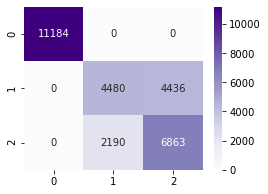

In [263]:
mat_lr1_test=confusion_matrix(data_test_y,y_pred_lr1_test)
confussion_matrix(mat_lr1_test)

In [264]:
print("precision_score_lr:",precision_score(data_test_y, y_pred_lr1_test,average='weighted')) 
print("recall_score_lr:",recall_score(data_test_y, y_pred_lr1_test,average='weighted'))
print("f1_score_lr:",f1_score(data_test_y, y_pred_lr1_test,average='weighted'))

precision_score_lr: 0.7776674724985578
recall_score_lr: 0.772716358522279
f1_score_lr: 0.7688814040954554


## Adaboost

In [265]:
y_pred_ada_test=ada.predict(data_test_x)
accuracy_ada_test=metrics.accuracy_score(data_test_y,y_pred_ada_test)
accuracy_ada_test

0.5911226974925393

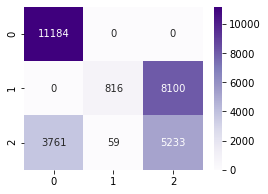

In [266]:
mat_ada_test=confusion_matrix(data_test_y,y_pred_ada_test)
confussion_matrix(mat_ada_test)

In [267]:
print("precision_score_lr:",precision_score(data_test_y, y_pred_ada_test,average='weighted')) 
print("recall_score_lr:",recall_score(data_test_y, y_pred_ada_test,average='weighted'))
print("f1_score_lr:",f1_score(data_test_y, y_pred_ada_test,average='weighted'))

precision_score_lr: 0.694180713787827
recall_score_lr: 0.5911226974925393
f1_score_lr: 0.5245713390744746


## vote

In [268]:
y_pred_vote1_test=vote1.predict(data_test_x)
accuracy_vote1_test=metrics.accuracy_score(data_test_y,y_pred_vote1_test)
accuracy_vote1_test

0.6964634857476074

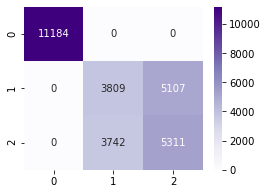

In [269]:
mat_vote1_test=confusion_matrix(data_test_y,y_pred_vote1_test)
confussion_matrix(mat_vote1_test)

In [270]:
print("precision_score_vote:",precision_score(data_test_y, y_pred_vote1_test,average='weighted')) 
print("recall_score_vote:",recall_score(data_test_y, y_pred_vote1_test,average='weighted'))
print("f1_score_vote:",f1_score(data_test_y, y_pred_vote1_test,average='weighted'))

precision_score_vote: 0.6962127894577029
recall_score_vote: 0.6964634857476074
f1_score_vote: 0.6945225516740339


In [ ]:
## Pipeline

In [447]:
y_pred_pipe_ada_test=pipe_ada.predict(data_test_x)
acuracy_pipe_ada_test=pipe_ada.score(data_test_x,data_test_y)
print(acuracy_pipe_ada_test)

print(confusion_matrix(data_test_y, y_pred_pipe_ada_test))

print("precision_score:",precision_score(data_test_y, y_pred_pipe_ada_test,average='weighted')) 
print("recall_score:",recall_score(data_test_y, y_pred_pipe_ada_test,average='weighted'))
print("f1_score:",f1_score(data_test_y, y_pred_pipe_ada_test,average='weighted'))

0.6894659211744932
[[11184     0     0]
 [    0  8916     0]
 [ 3761  5292     0]]
precision_score: 0.4790096972525906
recall_score: 0.6894659211744932
f1_score: 0.5642549302952723


In [448]:
y_pred_pipe_xg_test=pipe_xg.predict(data_test_x)
acuracy_pipe_xg_test=pipe_xg.score(data_test_x,data_test_y)
print(acuracy_pipe_xg_test)

print(confusion_matrix(data_test_y, y_pred_pipe_xg_test))

print("precision_score:",precision_score(data_test_y, y_pred_pipe_xg_test,average='weighted')) 
print("recall_score:",recall_score(data_test_y, y_pred_pipe_xg_test,average='weighted'))
print("f1_score:",f1_score(data_test_y, y_pred_pipe_xg_test,average='weighted'))

0.7033238431722293
[[11184     0     0]
 [    0  4009  4907]
 [    0  3742  5311]]
precision_score: 0.7032221229240676
recall_score: 0.7033238431722293
f1_score: 0.7019227795170111


In [449]:
y_pred_pipe_knn_test=pipe_knn.predict(data_test_x)
acuracy_pipe_knn_test=pipe_knn.score(data_test_x,data_test_y)
print(acuracy_pipe_knn_test)

print(confusion_matrix(data_test_y, y_pred_pipe_knn_test))

print("precision_score:",precision_score(data_test_y, y_pred_pipe_knn_test,average='weighted')) 
print("recall_score:",recall_score(data_test_y, y_pred_pipe_knn_test,average='weighted'))
print("f1_score:",f1_score(data_test_y, y_pred_pipe_knn_test,average='weighted'))

0.8779885432031009
[[11169     3    12]
 [    0  7290  1626]
 [    2  1914  7137]]
precision_score: 0.8782867554634822
recall_score: 0.8779885432031009
f1_score: 0.8780135963952805


In [450]:
y_pred_pipe_grb_test=pipe_grb.predict(data_test_x)
acuracy_pipe_grb_test=pipe_grb.score(data_test_x,data_test_y)
print(acuracy_pipe_grb_test)

print(confusion_matrix(data_test_y, y_pred_pipe_grb_test))

print("precision_score:",precision_score(data_test_y, y_pred_pipe_grb_test,average='weighted')) 
print("recall_score:",recall_score(data_test_y, y_pred_pipe_grb_test,average='weighted'))
print("f1_score:",f1_score(data_test_y, y_pred_pipe_grb_test,average='weighted'))

0.5663225054025315
[[11184     0     0]
 [    0  3776  5140]
 [ 3761  3742  1550]]
precision_score: 0.5126443596293094
recall_score: 0.5663225054025315
f1_score: 0.5301014038014383


In [451]:
y_pred_pipe_ada_test=y_pred_pipe_ada_test.astype(int)
y_pred_pipe_xg_test=y_pred_pipe_xg_test.astype(int)
y_pred_pipe_knn_test=y_pred_pipe_knn_test.astype(int)
y_pred_pipe_grb_test=y_pred_pipe_grb_test.astype(int)

In [471]:
y_pred_my_classifier_test=[]
for x in range(0,29153):
    if (y_pred_pipe_xg_test[x]==0):
        y_pred_my_classifier_test.append(y_pred_pipe_xg_test[x])
    elif (y_pred_pipe_grb_test[x]==1):
        y_pred_my_classifier_test.append(y_pred_pipe_grb_test[x])
    elif( y_pred_pipe_knn_test[x]==1 and y_pred_pipe_ada_test[x]==1):
         y_pred_my_classifier_test.append(y_pred_pipe_knn_test[x])
    else:
        y_pred_my_classifier_test.append(y_pred_pipe_xg_test[x]) 

In [473]:
accuracy_class_test=metrics.accuracy_score(data_test_y, y_pred_my_classifier_test)
accuracy_class_test

0.8206359551332625

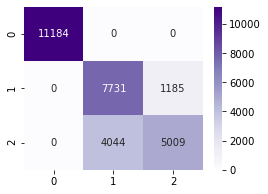

In [474]:
mat_class1_test=confusion_matrix(data_test_y, y_pred_my_classifier_test)
confussion_matrix(mat_class1_test)

In [475]:
print("precision_score:",precision_score(data_test_y, y_pred_my_classifier_test,average='weighted')) 
print("recall_score:",recall_score(data_test_y, y_pred_my_classifier_test,average='weighted'))
print("f1_score:",f1_score(data_test_y, y_pred_my_classifier_test,average='weighted'))

precision_score: 0.8355547036955592
recall_score: 0.8206359551332625
f1_score: 0.8162113778583752


# The best result I got is 82% using the pipeline with my classifier after.

### It classified the alone 100% coreect and had trouble classifiying the sych and spontan, but it mainly confused spontan with sync.